# Data Importing and Exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [2]:
# Import data
df = pd.read_csv("WHOMortalityDatabase_Deaths_sex_age_a_country_area_year-Self-inflicted injuries_29th Tháng 9 2023 10_04.csv", index_col = False)

First, let's explore our data.

In [3]:
df.head()

,Region Code,Region Name,Country Code,Country Name,Year,Sex,Age group code,Age Group,Number,Percentage of cause-specific deaths out of total deaths,Age-standardized death rate per 100 000 standard population,Death rate per 100 000 population
0,EU,Europe,ALB,Albania,1987,All,Age_all,[All],73.0,0.421332,2.4743,2.373135
1,EU,Europe,ALB,Albania,1987,All,Age00,[0],0.0,0.000000,NaN,0.000000
2,EU,Europe,ALB,Albania,1987,All,Age01_04,[1-4],0.0,0.000000,NaN,0.000000
3,EU,Europe,ALB,Albania,1987,All,Age05_09,[5-9],0.0,0.000000,NaN,0.000000
4,EU,Europe,ALB,Albania,1987,All,Age10_14,[10-14],0.0,0.000000,NaN,0.000000


In [4]:
df.shape

(299439, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299439 entries, 0 to 299438
Data columns (total 12 columns):
 #   Column                                                       Non-Null Count   Dtype  
---  ------                                                       --------------   -----  
 0   Region Code                                                  299439 non-null  object 
 1   Region Name                                                  299439 non-null  object 
 2   Country Code                                                 299439 non-null  object 
 3   Country Name                                                 299439 non-null  object 
 4   Year                                                         299439 non-null  int64  
 5   Sex                                                          299439 non-null  object 
 6   Age group code                                               299439 non-null  object 
 7   Age Group                                                    2994

Our data has 299438 rows and 12 columns. There are some missing values in the "Number", "Death rate per 100 000 population" and "Percentage of cause-specific deaths out of total deaths" feature. Most of the values in the "Age-standardized death rate per 100 000 standard population" feature is missing.

Time to do some exploring.

In [6]:
# Display rows with missing values of "Number" and "Death rate per 100 000 population"
df_miss = df[(df["Number"].isna()) & (df["Death rate per 100 000 population"].isna())]
df_miss.head()

,Region Code,Region Name,Country Code,Country Name,Year,Sex,Age group code,Age Group,Number,Percentage of cause-specific deaths out of total deaths,Age-standardized death rate per 100 000 standard population,Death rate per 100 000 population
1391,NAC,North America and the Caribbean,ATG,Antigua and Barbuda,1961,All,Age10_14,[10-14],NaN,NaN,NaN,NaN
1393,NAC,North America and the Caribbean,ATG,Antigua and Barbuda,1961,All,Age20_24,[20-24],NaN,NaN,NaN,NaN
1395,NAC,North America and the Caribbean,ATG,Antigua and Barbuda,1961,All,Age30_34,[30-34],NaN,NaN,NaN,NaN
1397,NAC,North America and the Caribbean,ATG,Antigua and Barbuda,1961,All,Age40_44,[40-44],NaN,NaN,NaN,NaN
1399,NAC,North America and the Caribbean,ATG,Antigua and Barbuda,1961,All,Age50_54,[50-54],NaN,NaN,NaN,NaN


In [7]:
# Count the number of appearance of unique values in "Age Group"
print(df_miss["Age Group"].value_counts(),"\n")

# Count the number of appearance of unique values in "Country Name"
print(df_miss["Country Name"].value_counts())

[80-84]    267
[85+]      267
[10-14]    120
[20-24]    120
[30-34]    120
[40-44]    120
[50-54]    120
[60-64]    120
[70-74]    120
Name: Age Group, dtype: int64 

Seychelles                          540
Jamaica                             162
Antigua and Barbuda                 135
Saint Kitts and Nevis               108
Bahrain                              72
Egypt                                72
Ecuador                              54
Belize                               39
Dominica                             39
Cabo Verde                           27
Martinique                           12
Republic of Korea                    12
Grenada                              12
Argentina                            12
Cyprus                               12
Qatar                                12
Guadeloupe                            6
Denmark                               6
Philippines                           6
Costa Rica                            6
Saint Lucia                      

After some investigation, I found out that most of the missing values in "Number" and "Death rate per 100 000 population" comes from small countries, for example Seychelles, Jamaica, Antigua and Barbuda, etc. Furthermore, the age distribution of those missing data points is peculiar. It appears that age group 80-84 and 85+ are having a lot of missing values in the number of suicide cases. The cause of this is probably difficulty in collecting data from such countries or age groups.

In [8]:
df.head(22)

,Region Code,Region Name,Country Code,Country Name,Year,Sex,Age group code,Age Group,Number,Percentage of cause-specific deaths out of total deaths,Age-standardized death rate per 100 000 standard population,Death rate per 100 000 population
0,EU,Europe,ALB,Albania,1987,All,Age_all,[All],73.0,0.421332,2.474300,2.373135
1,EU,Europe,ALB,Albania,1987,All,Age00,[0],0.0,0.000000,NaN,0.000000
2,EU,Europe,ALB,Albania,1987,All,Age01_04,[1-4],0.0,0.000000,NaN,0.000000
3,EU,Europe,ALB,Albania,1987,All,Age05_09,[5-9],0.0,0.000000,NaN,0.000000
4,EU,Europe,ALB,Albania,1987,All,Age10_14,[10-14],0.0,0.000000,NaN,0.000000
5,EU,Europe,ALB,Albania,1987,All,Age15_19,[15-19],9.0,4.663212,NaN,2.899485
6,EU,Europe,ALB,Albania,1987,All,Age20_24,[20-24],26.0,9.594096,NaN,8.898015
7,EU,Europe,ALB,Albania,1987,All,Age25_29,[25-29],7.0,2.928870,NaN,2.432245
8,EU,Europe,ALB,Albania,1987,All,Age30_34,[30-34],6.0,2.654867,NaN,2.462044
9,EU,Europe,ALB,Albania,1987,All,Age35_39,[35-39],5.0,2.525253,NaN,2.712968


However, this dataset actually has already aggreated data within itself. In a certain year, in a certain country, there is a row with Sex = all and Age Group = all that represents that country in that year. For example, let's take a look at the first row of the table above. Just by looking at the first row, we can already know that in 1987, Albania has a total of 73 suicide cases across all genders and age groups.

If that's the case, how did the data aggregation itself handle missing values from "Number"? 

In [9]:
# Exploring
df[df["Country Name"] == "Seychelles"].tail(21)

,Region Code,Region Name,Country Code,Country Name,Year,Sex,Age group code,Age Group,Number,Percentage of cause-specific deaths out of total deaths,Age-standardized death rate per 100 000 standard population,Death rate per 100 000 population
296373,AF,Africa,SYC,Seychelles,2015,Female,Age_all,[All],1.0,0.331126,2.506907,2.169009
296374,AF,Africa,SYC,Seychelles,2015,Female,Age_unknown,[Unknown],0.0,NaN,NaN,NaN
296375,AF,Africa,SYC,Seychelles,2015,Female,Age00,[0],0.0,0.000000,NaN,0.000000
296376,AF,Africa,SYC,Seychelles,2015,Female,Age01_04,[1-4],0.0,0.000000,NaN,0.000000
296377,AF,Africa,SYC,Seychelles,2015,Female,Age05_09,[5-9],0.0,0.000000,NaN,NaN
296378,AF,Africa,SYC,Seychelles,2015,Female,Age10_14,[10-14],NaN,NaN,NaN,NaN
296379,AF,Africa,SYC,Seychelles,2015,Female,Age15_19,[15-19],1.0,20.000000,NaN,NaN
296380,AF,Africa,SYC,Seychelles,2015,Female,Age20_24,[20-24],NaN,NaN,NaN,NaN
296381,AF,Africa,SYC,Seychelles,2015,Female,Age25_29,[25-29],0.0,0.000000,NaN,NaN
296382,AF,Africa,SYC,Seychelles,2015,Female,Age30_34,[30-34],NaN,NaN,NaN,NaN


Looking at the first row of the above table, we know that the number of suicide incidents of Africa in 2015, with female gender, is 1. That means the aggregated row (the row with sex_all or age_all) is treating all the NaN values as 0. With that information, I'll impute all NaN values from "Number" into 0.

By imputing the null values in "Number" to 0, the NaNs in "Death rate per 100 000 population" must also be 0.

In [10]:
# Create a copy of df
df1 = df.copy()

# Impute null into 0 ("Number" and "Death rate per 100 000 population")
df1.loc[df1['Number'].isna(), 'Death rate per 100 000 population'] = df1.loc[df1['Number'].isna(), 'Death rate per 100 000 population'].fillna(0)
df1.loc[df1['Number'] == 0, 'Death rate per 100 000 population'] = df1.loc[df1['Number'] == 0, 'Death rate per 100 000 population'].fillna(0)
df1[df1["Number"].isna()] = df1[df1["Number"].isna()].fillna(0)

In [11]:
# Check the NaNs again
df1[df1["Country Name"] == "Seychelles"].tail(21)

,Region Code,Region Name,Country Code,Country Name,Year,Sex,Age group code,Age Group,Number,Percentage of cause-specific deaths out of total deaths,Age-standardized death rate per 100 000 standard population,Death rate per 100 000 population
296373,AF,Africa,SYC,Seychelles,2015,Female,Age_all,[All],1.0,0.331126,2.506907,2.169009
296374,AF,Africa,SYC,Seychelles,2015,Female,Age_unknown,[Unknown],0.0,NaN,NaN,0.000000
296375,AF,Africa,SYC,Seychelles,2015,Female,Age00,[0],0.0,0.000000,NaN,0.000000
296376,AF,Africa,SYC,Seychelles,2015,Female,Age01_04,[1-4],0.0,0.000000,NaN,0.000000
296377,AF,Africa,SYC,Seychelles,2015,Female,Age05_09,[5-9],0.0,0.000000,NaN,0.000000
296378,AF,Africa,SYC,Seychelles,2015,Female,Age10_14,[10-14],0.0,0.000000,0.000000,0.000000
296379,AF,Africa,SYC,Seychelles,2015,Female,Age15_19,[15-19],1.0,20.000000,NaN,NaN
296380,AF,Africa,SYC,Seychelles,2015,Female,Age20_24,[20-24],0.0,0.000000,0.000000,0.000000
296381,AF,Africa,SYC,Seychelles,2015,Female,Age25_29,[25-29],0.0,0.000000,NaN,0.000000
296382,AF,Africa,SYC,Seychelles,2015,Female,Age30_34,[30-34],0.0,0.000000,0.000000,0.000000


This looks better than the original data frame. Although there are still some anomalies in "Death rate per 100 000 population", I'll leave it be since without information about gender and age group's population, I can't deal with missing values in this feature.

I'll create some more data frames for easier manipulation.

In [12]:
# Data frame separated by year and country
df_big = df1[(df1["Sex"] == "All") & (df1["Age Group"] == "[All]")]
df_big.sort_values(by = ["Country Name", "Year"]).head(5)

,Region Code,Region Name,Country Code,Country Name,Year,Sex,Age group code,Age Group,Number,Percentage of cause-specific deaths out of total deaths,Age-standardized death rate per 100 000 standard population,Death rate per 100 000 population
0,EU,Europe,ALB,Albania,1987,All,Age_all,[All],73.0,0.421332,2.474300,2.373135
63,EU,Europe,ALB,Albania,1988,All,Age_all,[All],63.0,0.364731,2.234553,2.007584
127,EU,Europe,ALB,Albania,1989,All,Age_all,[All],68.0,0.374264,2.352272,2.136752
189,EU,Europe,ALB,Albania,1992,All,Age_all,[All],47.0,0.272653,1.604659,1.473308
252,EU,Europe,ALB,Albania,1993,All,Age_all,[All],73.0,0.438728,2.503264,2.304657


Looks like there are some years with missing data. I hope this is just a rare occurence.

In [13]:
# Data frame separated by year, country and gender
df_medium1 = df1[(df1["Sex"] != "All") & (df1["Age Group"] == "[All]")]

# Data frame separated by year, country and age group
df_medium2 = df1[(df1["Sex"] == "All") & (df1["Age Group"] != "[All]")]

In [14]:
# Data frame separated by year, country, gender and age group
df_small = df1[(df1["Sex"] != "All") & (df1["Age Group"] != "[All]")]

# Export dataset to create dashboard
df_small.to_csv("dataset.csv", index = False)
df_big.to_csv("df_big.csv", index = False)

# Data Visualization

### Suicide global trend

First, let us explore the number of suicide incidents on the global scale throughout history.

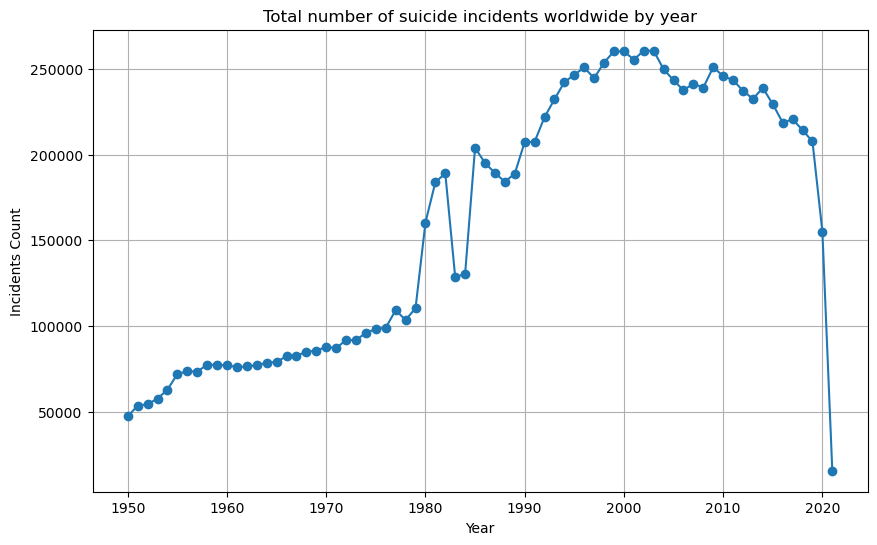

In [15]:
# Calculate number and average number of incidents per year
df_incidents_year = df_big.groupby("Year").agg(n_incidents = ("Number", "sum"), 
                                               avg_n_incidents = ("Number", "mean"),
                                               n_countries = ("Number", "count")).reset_index()

# Visualize
plt.figure(figsize = (10,6))
plt.plot(df_incidents_year["Year"], df_incidents_year["n_incidents"], marker = "o", linestyle = "-")
plt.xlabel('Year')
plt.ylabel('Incidents Count')
plt.title("Total number of suicide incidents worldwide by year")
plt.grid(True)
plt.show()

Overall, the number of suicide incidents on the global scale has a gradual increase from 50000 to 100000 cases in 1950-1978, fluctuates unexpectedly from 1979 to 1988 and increases a little more to about 250,000 cases in 1996. Then it remains quite stable until witnessing a sudden drop in 2020 and 2021.

There are 2 points of interest in this graph.
- There is an unsual fluctuation of number of incidents from 1979 to 1988.
- The incidents count significantly drops in 2020-2021.

This graph presents the total cases globally. If in a certain year, the data only captures information in 100 countries, then the sum of cases of that year can not be compared to years where suicide incidents are recorded all over the world. This may be the reason why some data points in the graph have unsually low value. Let's plot a graph to see things more clearly.

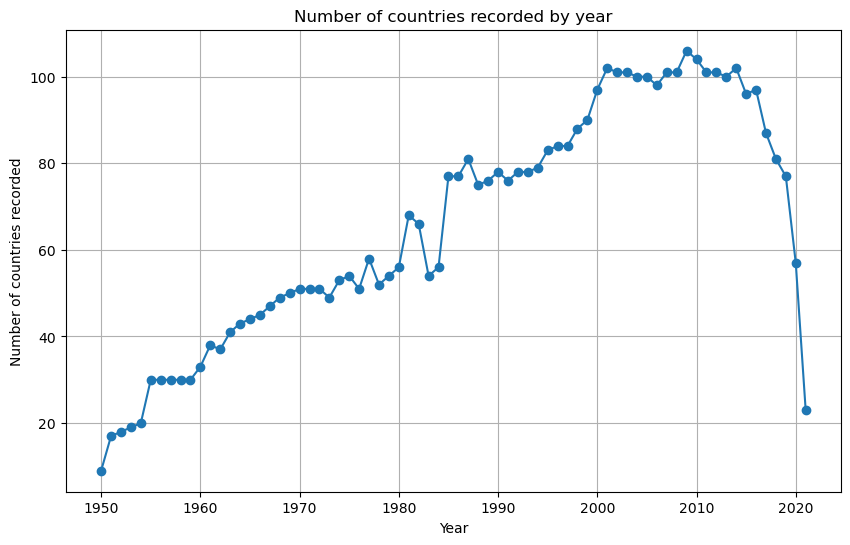

In [16]:
# Visualize number of countries recorded by year
plt.figure(figsize = (10,6))
plt.plot(df_incidents_year["Year"], df_incidents_year["n_countries"], marker = "o", linestyle = "-")
plt.xlabel('Year')
plt.ylabel('Number of countries recorded')
plt.title("Number of countries recorded by year")
plt.grid(True)
plt.show()

The above graph has partially answered our first question about the unusual fluctuation of incidents from 1979 to 1988. For some reason, in 1984 and 1985, there is a drop in number of countries recorded. In other words, data is collected from fewer countries, which leads to a decrease in the sum of incidents worldwide. To have a more thorough understanding of the data, let's plot another graph.

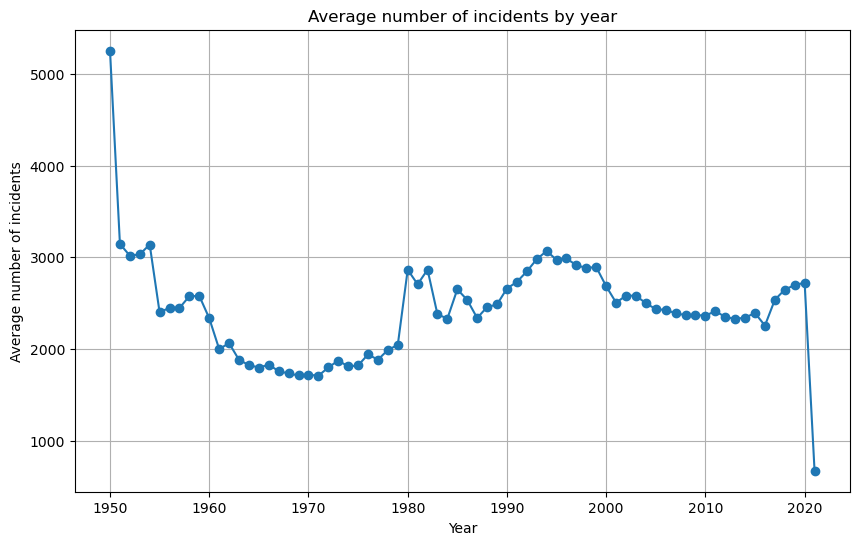

In [17]:
# Visualize the average number of incidents by year
plt.figure(figsize = (10,6))
plt.plot(df_incidents_year["Year"], df_incidents_year["avg_n_incidents"], marker = "o", linestyle = "-")
plt.xlabel('Year')
plt.ylabel('Average number of incidents')
plt.title("Average number of incidents by year")
plt.grid(True)
plt.show()

This graph shows the intensity of suicidal acts worldwide throughout the years. The year 1979 to 1982 also shows an sudden upward trend of average number of incidents, similar to that of total number of incidents. It means that during this period, there is actually an increase in suicidal incidents, not just because of having more data from countries. Also, the intensity raises from the year 1988 to its peak at 1994, then drops gradually in the following years. 

The reason I ignore data points like the year 1950-1955 and 2021 is because of the lack of data coverage of this matter. In 1950, the data only consists of incidents from fewer than 10 countries. If all those countries belong to a high suicide rates group (group where there are lots of people committing self harm), the average number of incidents would be exceptionally high, which is unreliable and unrepresentative of the whole world. The effect still holds true for larger sample sizes, but it is somewhat mitigated. Unfortunately, that's as far as the data can go. Knowing this weakness of our data, we must be careful in upcoming time-series analysis.

### Suicide trend of Viet Nam

I am from Viet Nam so it's natural that I am curious about this matter.

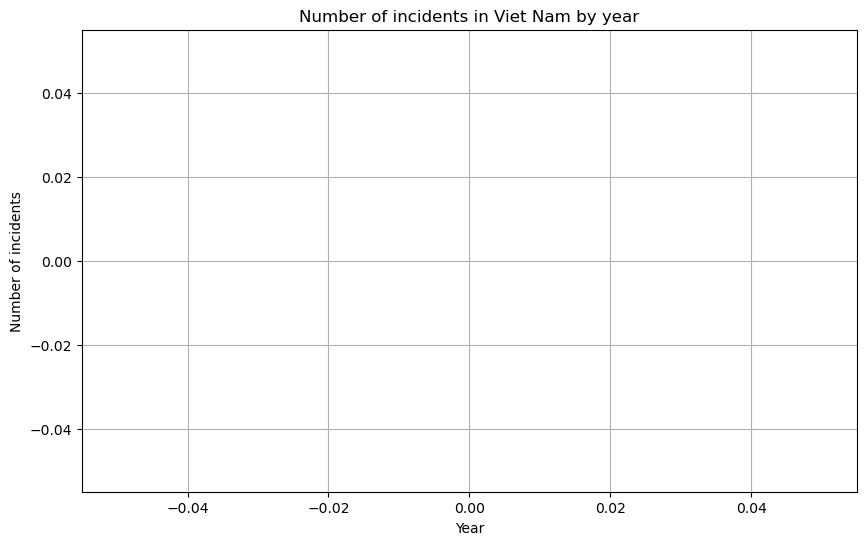

In [18]:
# Visualize the number of incidents in VIet Nam over the year
plt.figure(figsize = (10,6))
plt.plot(df_big[df_big["Country Name"] == "Vietnam"]["Year"], df_big[df_big["Country Name"] == "Vietnam"]["Number"], marker = "o", linestyle = "-")
plt.xlabel('Year')
plt.ylabel('Number of incidents')
plt.title("Number of incidents in Viet Nam by year")
plt.grid(True)
plt.show()

Wow. This data doesn't even have Viet Nam in it. I ... don't know what to say. Time to move on with the analysis I guess.

### Death trend by region and country

I'll repeat the visualization process like the previous section, but this time I'll group the data by regions and country.

In [19]:
# Group data by region
df_big_region = df_big.groupby("Region Name").agg(n_deaths = ("Number", "mean"), 
                                                  n_datapoints = ("Number", "count"),
                                       pct_deaths = ("Percentage of cause-specific deaths out of total deaths", "mean"),
                                       death_rate = ("Death rate per 100 000 population", "mean")).reset_index()
df_big_region.sort_values(by = "n_deaths", ascending = False)

,Region Name,n_deaths,n_datapoints,pct_deaths,death_rate
4,North America and the Caribbean,3115.084881,754,0.790311,5.896784
1,Asia,2954.081236,874,1.395340,8.296961
3,Europe,2858.766213,1912,1.458150,15.320270
5,Oceania,1093.833333,150,1.434637,10.944040
2,Central and South America,1070.474654,868,1.070768,6.256627
0,Africa,106.576687,163,0.792044,5.254015


North America and the Caribbean region has the highest average number of deaths of 3115.08. Asia and Europe also have high numbers of self harm incidents. Adding population into consideration, Europe has the highest death rate of 15.32, meaning that out of 100000 population in Europe, there are about 15.32 people who commit suicide. Moreover, Europe's percentage of deaths is also the highest, indicating that 1.46% of all deaths occurred in Europe is related to self harm, almost double that of North America and the Caribbean and Africa.

Although North America and the Caribbean region has many deaths, it is only equivalent to 5.9 people per 100000 population. Meanwhile, Oceania only has 1093,83 deaths but nearly 11 deaths per 100000 population. Combining with data from pct_deaths, we can see that a large proportion of Oceania's population commit suicide.



Let investigate further into country level.

In [20]:
# Group data by region
df_big_country = df_big.groupby("Country Name").agg(n_deaths = ("Number", "mean"), 
                                                  n_datapoints = ("Number", "count"),
                                       pct_deaths = ("Percentage of cause-specific deaths out of total deaths", "mean"),
                                       death_rate = ("Death rate per 100 000 population", "mean")).reset_index()

# Sort our table by number of deaths
df_big_country.sort_values(by = "n_deaths", ascending = False).head(10)

,Country Name,n_deaths,n_datapoints,pct_deaths,death_rate
89,Russian Federation,41738.315789,38,2.167559,28.910833
114,United States of America,28799.816901,71,1.332971,11.758205
53,Japan,22097.422535,71,2.567379,19.469919
111,Ukraine,11004.685714,35,1.604675,22.638433
39,Germany,10904.419355,31,1.246539,13.331488
36,France,9414.985294,68,1.752034,17.305251
86,Republic of Korea,9141.277778,36,3.613825,18.773350
14,Brazil,7524.000000,42,0.733843,4.263339
113,United Kingdom of Great Britain and Northern I...,4794.521127,71,0.770203,8.431097
81,Poland,4688.526316,57,1.370408,12.870734


*Note*: The n_datapoints of the above table is actually the number of years that the deaths data is collected between 1950 and 2021. For example, our data about Russia captures suicide data of 38 years out of 71 years (1950-2021). 

Our data shows that Russia has the highest deaths in the world. It also has an astonishing high death rate of 28.91 and pct_death of 2.17, implying that with a population of 100000, there are 28.91 people who commit self harm acts, and it accounts for 2.17% of total deaths by various reasons. The US and Japan also have a high number of deaths nationwide over the years.

In [21]:
# Sort the table by pct_deaths
df_big_country.sort_values(by = "pct_deaths", ascending = False).head(5)

,Country Name,n_deaths,n_datapoints,pct_deaths,death_rate
86,Republic of Korea,9141.277778,36,3.613825,18.773350
101,Sri Lanka,3315.025000,40,3.117820,20.257651
60,Lithuania,1165.846154,39,2.839630,34.737091
44,Guyana,141.636364,33,2.811804,18.739952
98,Slovenia,519.444444,36,2.706734,25.843656


Although Korea doesn't have too many deaths, but in terms of Percentage of cause-specific deaths out of total deaths, Korea is in first place. It means that Korea has the largest self-inflicted deaths by total number of deaths ratio in the world.

In [22]:
# Sort the table by death_rate
df_big_country.sort_values(by = "death_rate", ascending = False).head(5)

,Country Name,n_deaths,n_datapoints,pct_deaths,death_rate
60,Lithuania,1165.846154,39,2.839630,34.737091
45,Hungary,3256.353846,65,2.516632,31.585346
89,Russian Federation,41738.315789,38,2.167559,28.910833
58,Latvia,636.119048,42,1.938589,26.762110
10,Belarus,2651.206897,29,2.131421,26.611263


This table sorts countries by the number of self inflicted deaths per 100000 population. Lithuana doesn't have many deaths, but taking population into consideration, it still is a huge proportion of Lithuana's population.

### Death trend by gender

After analyzing self harm acts between different regions and countries, let's explore whether this type of death is affected by gender.

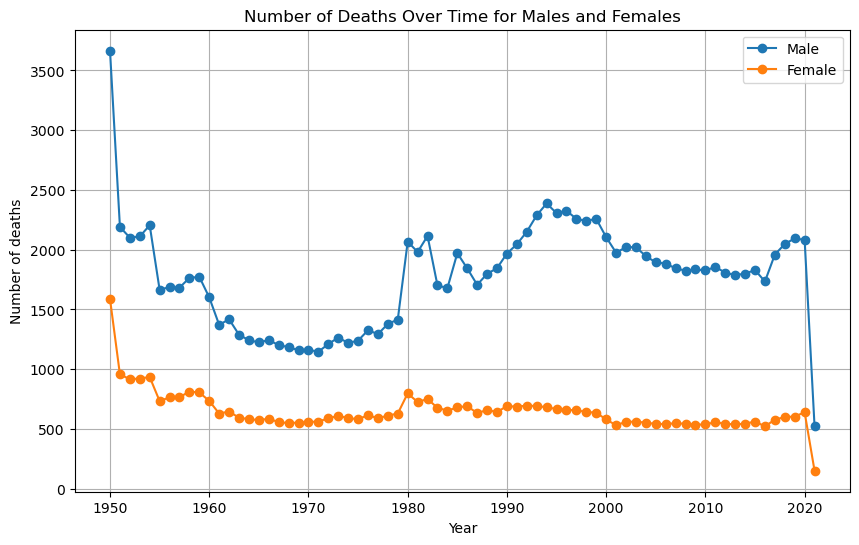

In [23]:
# Group data by gender and year
df_medium1_gender = df_medium1.groupby(["Year", "Sex"]).agg(n_deaths = ("Number", "mean"), 
                                       pct_deaths = ("Percentage of cause-specific deaths out of total deaths", "mean"),
                                       death_rate = ("Death rate per 100 000 population", "mean")).reset_index()

# Subset the data
male_data = df_medium1_gender[df_medium1_gender['Sex'] == 'Male']
female_data = df_medium1_gender[df_medium1_gender['Sex'] == 'Female']

plt.figure(figsize = (10,6))

# Create a line plot for n_deaths of males
plt.plot(male_data['Year'], male_data['n_deaths'], label='Male', marker='o')

# Create a line plot for n_deaths of females
plt.plot(female_data['Year'], female_data['n_deaths'], label='Female', marker='o')

plt.xlabel('Year')
plt.ylabel('Number of deaths')
plt.title('Number of Deaths Over Time for Males and Females')
plt.legend()
plt.grid(True)
plt.show()

It it clear that women are less involved in self harm acts than men, or at least not to the point of death. Number of deaths of women remains quite stable throughout history. It is also not strongly affected by the surge in deaths of men in 1979 or 1988-1994. 

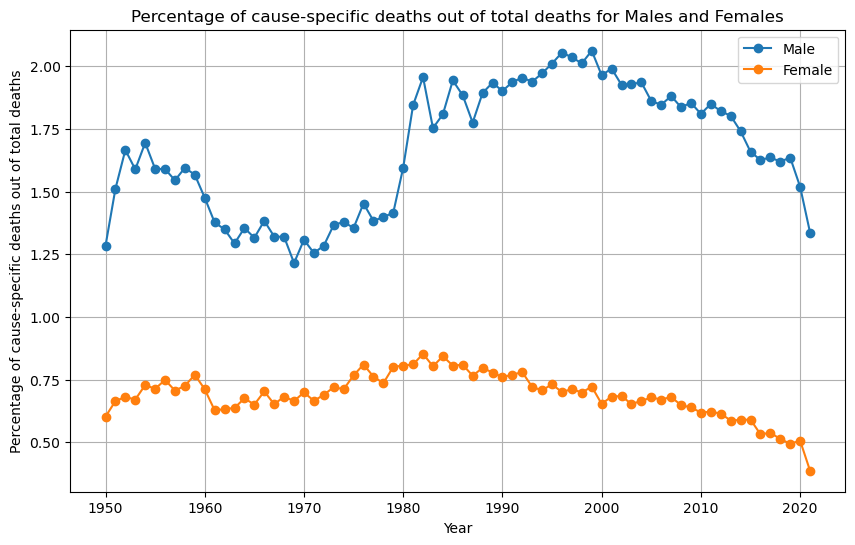

In [24]:
plt.figure(figsize = (10,6))

# Create a line plot for n_deaths of males
plt.plot(male_data['Year'], male_data['pct_deaths'], label='Male', marker='o')

# Create a line plot for n_deaths of females
plt.plot(female_data['Year'], female_data['pct_deaths'], label='Female', marker='o')

plt.xlabel('Year')
plt.ylabel('Percentage of cause-specific deaths out of total deaths')
plt.title('Percentage of cause-specific deaths out of total deaths for Males and Females')
plt.legend()
plt.grid(True)
plt.show()

The percentage of cause-specific deaths out of total deaths of women is also showing stability, similar to number of deaths. However, the line of men is interesting. From 1960 to 1964, the percentage of self inflicted deaths for men suddenly drops. It fluctuates a little over the years and skyrockets in 1979. It remains high for about 30 years, then decreases slowly from 2010 onwards. 

It's really hard to explain why the percentage of deaths for men is fluctuating. There could be many factors contributing to this. With my humble and limited knowledge, I will not try to claim any cause-effect with certainty.

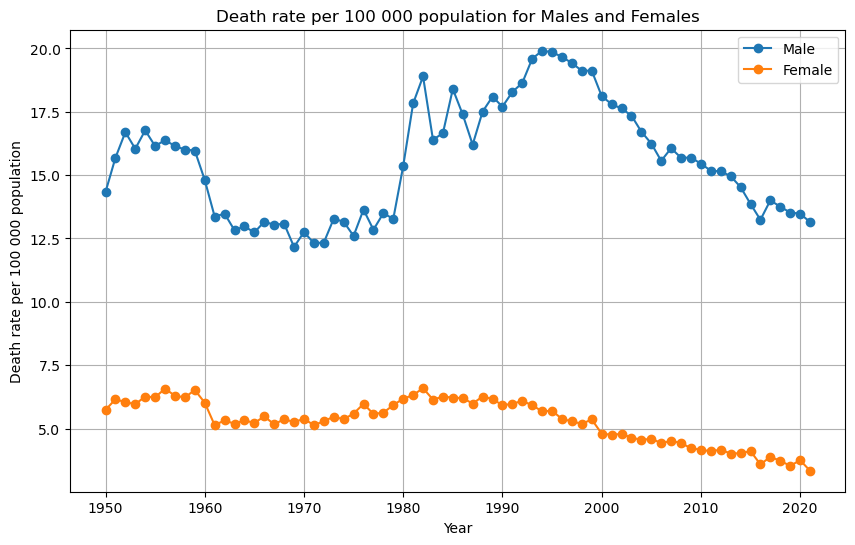

In [25]:
plt.figure(figsize = (10,6))

# Create a line plot for n_deaths of males
plt.plot(male_data['Year'], male_data['death_rate'], label='Male', marker='o')

# Create a line plot for n_deaths of females
plt.plot(female_data['Year'], female_data['death_rate'], label='Female', marker='o')

plt.xlabel('Year')
plt.ylabel('Death rate per 100 000 population')
plt.title('Death rate per 100 000 population for Males and Females')
plt.legend()
plt.grid(True)
plt.show()

The trend of Death rate per 100 000 population is similar to the Percentage of cause-specific deaths out of total deaths over the years. In the 1950-1960 and 1980-2010 period, for men, a larger proportion of the population is involved in suicidal incidents compared to 1960-1980 and 2010 onwards. Female data is stable as always.

So we're done with data over the years, let's move on to the regions.

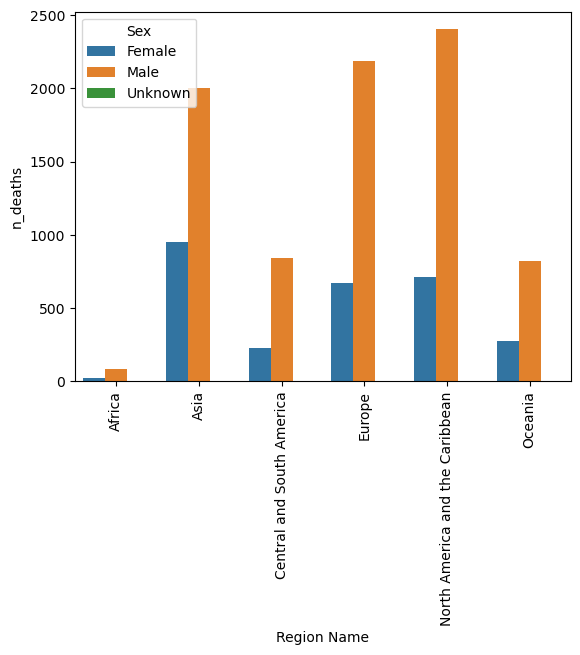

In [26]:
# Group data by gender and year
df_medium1_gender = df_medium1.groupby(["Region Name", "Sex"]).agg(n_deaths = ("Number", "mean"), 
                                                                   n_deaths1 = ("Number", "sum"),
                                       pct_deaths = ("Percentage of cause-specific deaths out of total deaths", "mean"),
                                       death_rate = ("Death rate per 100 000 population", "mean")).reset_index()

# Subset the data
male_data = df_medium1_gender[df_medium1_gender['Sex'] == 'Male']
female_data = df_medium1_gender[df_medium1_gender['Sex'] == 'Female']

# Visualize
sns.barplot(data = df_medium1_gender, x = "Region Name", y = "n_deaths", hue = "Sex")
plt.xticks(rotation = 90)
plt.show()

The graph doesn't add too much information. We already know that men tend to commit self inflicted acts more often than women. I'll analyze the percentage of deaths by gender.

C:\Users\Hi There!\AppData\Local\Temp\ipykernel_15980\1983538789.py:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df_medium1_gender["pct_death_gender"] = df_medium1_gender.groupby("Region Name")["n_deaths1"].apply(lambda x: (x / x.sum()) * 100)


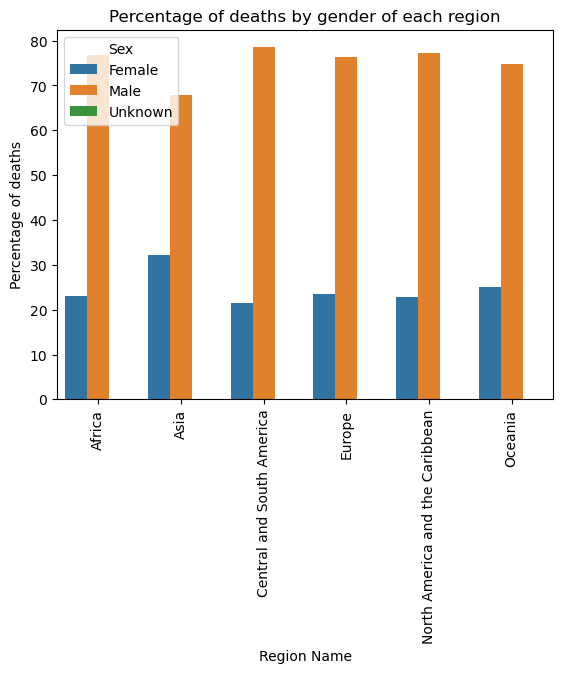

In [27]:
# Calculate the percentage of deaths by gender
df_medium1_gender["pct_death_gender"] = df_medium1_gender.groupby("Region Name")["n_deaths1"].apply(lambda x: (x / x.sum()) * 100)

# Visualize
sns.barplot(data = df_medium1_gender, x = "Region Name", y = "pct_death_gender", hue = "Sex")
plt.ylabel("Percentage of deaths")
plt.title("Percentage of deaths by gender of each region")
plt.xticks(rotation = 90)
plt.show()


Asia stands out the most with women accounting for over 30% deaths while men only account for less than 70%. 

I personally think this has something to do with the extreme gender inequality in Asia. Women in Western countries like China, Korea, Japan, Viet Nam,... had been suffering inequality for a prolonged period of time. Even in modern days, efforts are still being made to lessen this phenomenon. But again, there could be numerous factors adding to the high level of suicidal acts of women in Asia. I can only provide my best guess and viewpoint on this matter.


### Death trend by age group

Let's analyze the trend of self inflicted death globally of different age groups.

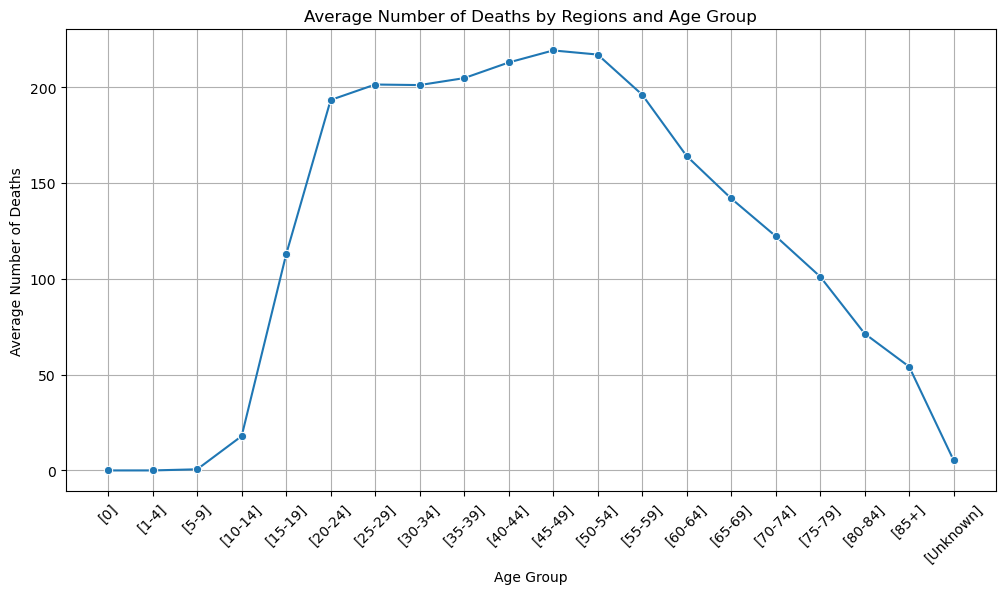

In [28]:
# Group data by year and age group
df_medium2_year = df_medium2.groupby(["Age Group"]).agg(avg_n_deaths = ("Number", "mean")).reset_index()

# Create the order of age group
order = ["[0]", "[1-4]", "[5-9]", '[10-14]', '[15-19]', '[20-24]', '[25-29]', '[30-34]', '[35-39]', '[40-44]', '[45-49]', 
         '[50-54]', '[55-59]', '[60-64]', '[65-69]', '[70-74]', '[75-79]', '[80-84]', '[85+]', '[Unknown]']
df_medium2_year["Age Group"] = pd.Categorical(df_medium2_year["Age Group"], categories=order, ordered=True)

# Visualize
plt.figure(figsize = (12,6))
sns.lineplot(data = df_medium2_year, x = "Age Group", y = "avg_n_deaths", marker = "o")
plt.title("Average Number of Deaths by Regions and Age Group")
plt.xlabel("Age Group")
plt.ylabel("Average Number of Deaths")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

On the global scale, 45-49 age group has the highest average number of self inflicted deaths, followed by 50-54 and 40-44. People ranging from 20 to 59 years old tend to be more involved in suicidal acts. 

There are some unexpected infant deaths in our dataset. I genuinely don't understand how a newborn baby could purposely do harm to themself. After some quick research, the reason might lie in some infant's underlying medical conditions where they inflict self damage unintentionally, though this is extremely rare.

Next, I'll aggregate data by region.

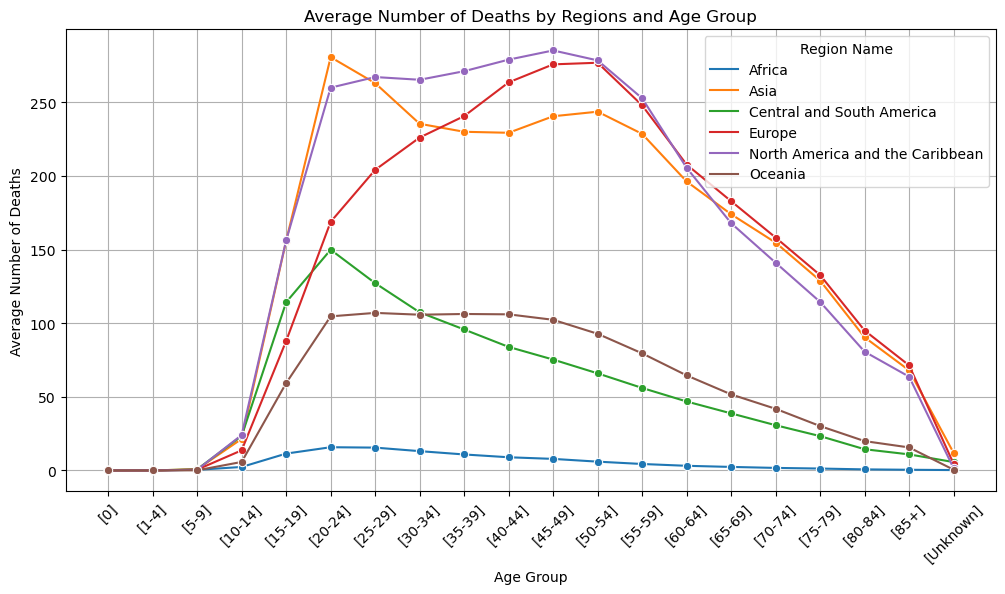

In [29]:
# Group data by region and age group
df_medium2_region = df_medium2.groupby(["Region Name","Age Group"]).agg(avg_n_deaths = ("Number", "mean")).reset_index()

# Apply the order of age group
df_medium2_region["Age Group"] = pd.Categorical(df_medium2_region["Age Group"], categories=order, ordered=True)

# Visualize
plt.figure(figsize = (12,6))
sns.lineplot(data = df_medium2_region, x = "Age Group", y = "avg_n_deaths", hue = "Region Name", marker = "o")
plt.title("Average Number of Deaths by Regions and Age Group")
plt.xlabel("Age Group")
plt.ylabel("Average Number of Deaths")
plt.legend(title="Region Name", loc="best")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

The number of self inflicted deaths between all age groups of different regions follows the same trend: increases rapidly from 10 to 24 years old. Asia and Central and South America reach their peaks at 20-24 and decrease gradually; North America and the Caribbean, Africa and Oceania don't decrease immediately after 20-24, but remain stable for several following age groups before going down; Europe is the strangest region where death count continues to go up until 50-54 before declining.


# Conclusion and suggestions

After thorough inspection of WHO suicide data, I have concluded a few points:
- On the global scale:
  - The year 1979 to 1982 shows an sudden upward trend of number of self inflicted deaths.
  - 45-49 age group has the highest average number of self inflicted deaths. 
  - People ranging from 20 to 59 years old tend to be the most involved in suicidal acts.
- On the regional scale:
  - North America and the Caribbean region has the highest average number of deaths.
  - Out of 100000 population in Europe, there are about 15.32 people who commit suicide. 1.46% of all deaths occurred in Europe is related to self harm.
- Gender-Specific:
  - Overall, women are less involved in self harm acts than men.
  - In Asia, women account for over 30% self inflicted deaths while men only account for less than 70%.

With these insights, I'll provide some suggestions:
- Acknowledge the reason people are the most vulnerable to self harm at the age 45 to 49 and raise awareness to this specific age group.
- People should not commit self inflicted harm, especially younger people. Schools should implement life skills programs dedicated to raise awareness.
- There is definitely an answer to why men are always having higher number of deaths than women no matter the difference in geographics, locations or age groups. We should be more empathetic to men so as to understand their difficulties, hence achive true gender equality.
- The fact that Asian women are more affiliated with self harm than women from other parts of the world can also be a proof of gender inequality. 
- We must take firm steps to address the obsolete sections of our culture where they lower women's importance and over pressure men to be successful. This will definitely raise the level of happiness for humanity.

*Note: This data doesn't have Viet Nam in it. Sad.*